In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer, f1_score

In [2]:
final_dataset = pd.read_csv('cleaned_data.csv')
final_dataset.head(5)

,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,male,female,target
0,-1.217670,-0.757524,-0.162324,-0.072187,-0.099863,-0.961110,-1.240737,0.361848,0.391573,-0.177185,-1.145519,1.145519,0
1,-0.397103,-0.757524,-0.162324,-0.072187,-0.099863,0.335695,-0.496956,0.832289,1.685033,-0.262482,0.872966,-0.872966,0
2,-0.162655,0.918782,-0.162324,-0.072187,-0.099863,0.217804,-0.174651,-0.073845,-0.039581,-0.774266,-1.145519,1.145519,0
3,-0.397103,1.170228,-0.162324,-0.072187,-0.099863,1.160935,-0.050687,-0.672588,0.822726,0.505193,0.872966,-0.872966,0
4,-0.748775,-0.757524,-0.162324,-0.072187,-0.099863,-0.183027,2.428583,1.251944,0.132880,1.699355,0.872966,-0.872966,0


<br>

### Labeling the Dataset and doing Train, Test and Split

In [3]:
X = final_dataset.drop('target', axis=1).to_numpy()
y = final_dataset.target.to_numpy()

# Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Selecting the Estimator

In [4]:
logReg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=49)
logReg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=49)

#### Predicting and Using Evaluation Metrics

In [5]:
# Prediction
y_pred = logReg.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.3f}%")

# Precision Score
precision = precision_score(y_test, y_pred)
print(f"\nPrecision: {precision*100:.3f}%")

# Recall Score
recall = recall_score(y_test, y_pred)
print(f"\nRecall: {recall*100:.3f}%")

# roc_auc Score
y_proba = logReg.predict_proba(X_test_scaled)[:, 1]
print(f"\nROC AUC Score: {(roc_auc_score(y_test, y_proba))*100:.3f}%")

Accuracy: 66.800%

Precision: 59.671%

Recall: 78.097%

ROC AUC Score: 73.164%


In [6]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score :{f1*100:.3f}%")

F1-Score :67.652%


In [7]:
# Checking the training accuracy and testing accuracy
print(logReg.score(X_train, y_train))
print(logReg.score(X_test, y_test))

0.6468475658419792
0.6679968076616122


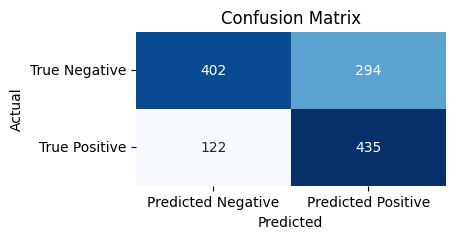

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### HyperParameter tuning to find out best result

In [9]:
hyperparameter = { 
    "penalty": ['l2'],
    "solver" : ['saga', 'sag'],
    "C": [0.01, 0.1, 1, 10, 100],
    "max_iter": [500, 1000, 1500],
}

In [10]:
f1_scorer = make_scorer(f1_score)

In [11]:
grid_search  = GridSearchCV(estimator=logReg, param_grid=hyperparameter, cv=3, scoring=f1_scorer)

In [12]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=49),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [500, 1000, 1500], 'penalty': ['l2'],
                         'solver': ['saga', 'sag']},
             scoring=make_scorer(f1_score, response_method='predict'))

In [13]:
logReg.set_params(**grid_search.best_params_)
logReg.fit(X_train_scaled, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=500, random_state=49,
                   solver='saga')

#### Predicting and Evaluating the model

In [14]:
# Prediction
y_predict = logReg.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy*100:.3f}")

# Precision Score
precision = precision_score(y_test, y_predict)
print(f"\nPrecision: {precision*100:.3f}")

# Recall Score
recall = recall_score(y_test, y_predict)
print(f"\nRecall: {recall*100:.3f}")

# roc_auc Score
y_proba = logReg.predict_proba(X_test_scaled)[:, 1]
print(f"\nROC AUC Score: {(roc_auc_score(y_test, y_proba))*100:.3f}")

Accuracy: 66.800

Precision: 59.671

Recall: 78.097

ROC AUC Score: 73.165


In [15]:
f1 = f1_score(y_test, y_predict)
print(f"F1-Score: {f1*100:.3f}%")

F1-Score: 67.652%


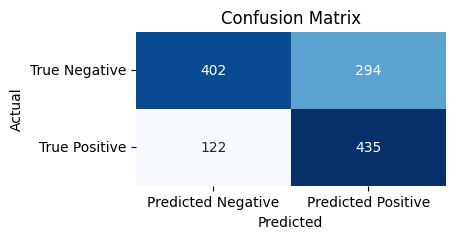

In [16]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<br>